# Assessment on Statistics for Decision Making

In [8]:
## Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

## Description

- Coding Questions Instructions: The assessment will have two sections, concept and coding problems.
- These problems will test you on your ability to manipulate real world data and answer statistical questions. The data is on real estate prices in Australia. Use this data to test the following Hypothesis: 

# Step 1: Load the Data and Perform EDA

## Data Overview

In [9]:
# Load the dataset & Display the first few rows

df = pd.read_csv(r"D:\property.csv")
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [10]:
# Display data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [11]:
# Summary statistics 

df.describe().T

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

## Missing Values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


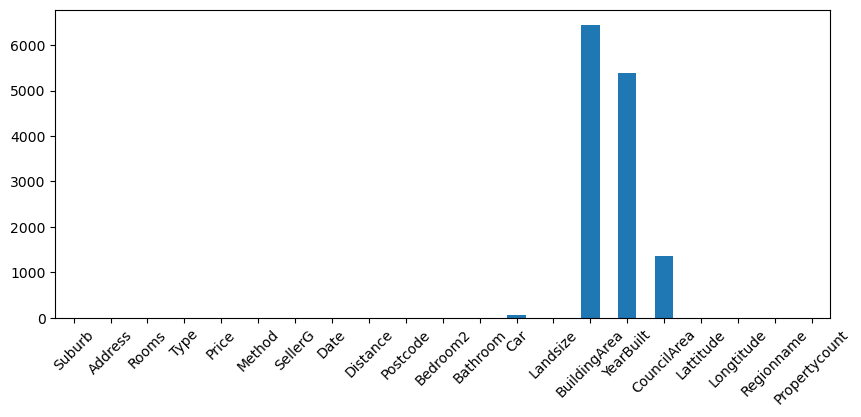

In [12]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data
df.isna().sum().plot(kind='bar',figsize=(10, 4))
plt.tick_params(axis='x', rotation=45)
plt.show()

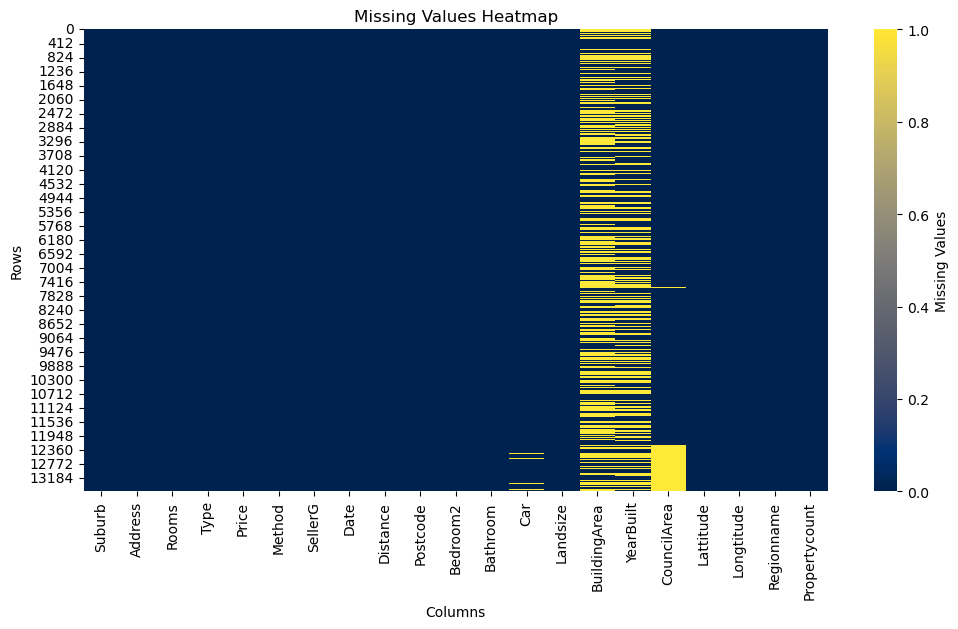

In [13]:
# Calculate missing values
missing_values = df.isnull() 

# Create heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values, cmap='cividis', cbar_kws={'label': 'Missing Values'}, annot=False) 

# Show plot
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## Analyze Categorical Variables

Categorical Columns:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


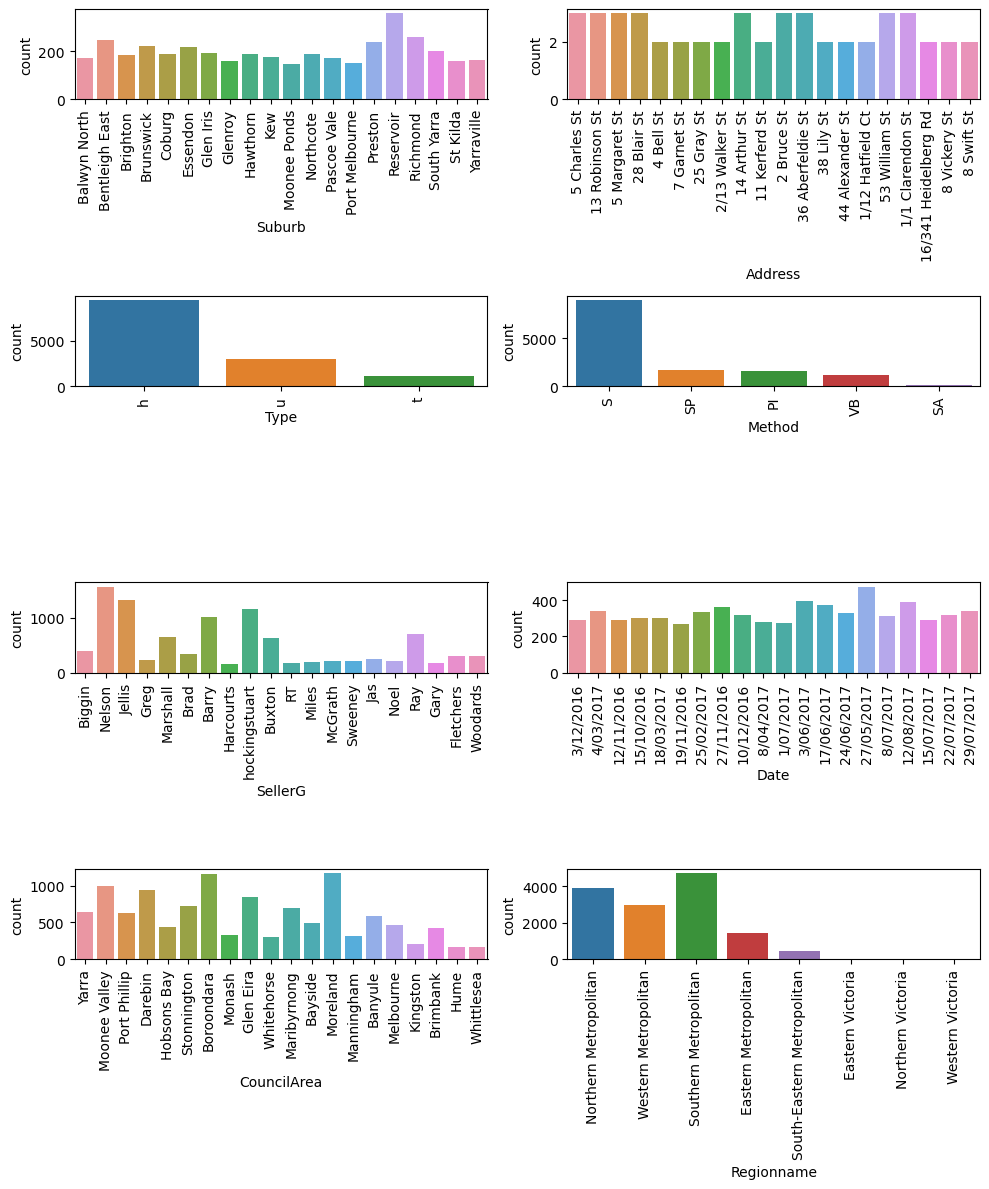

In [14]:
# Get categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Print categorical columns
print("Categorical Columns:")
print(cat_cols)

# Plot histograms for categorical columns
n_rows = len(cat_cols) // 2 + (len(cat_cols) % 2)
plt.figure(figsize=(10, n_rows * 3))
for i, column in enumerate(cat_cols):
    plt.subplot(n_rows, 2, i + 1)
    top_categories = df[column].value_counts().index[:20]  # Get top 20 categories
    sns.countplot(x=column, data=df[df[column].isin(top_categories)])
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

## Analyze Numeric Variables

Numeric Columns:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


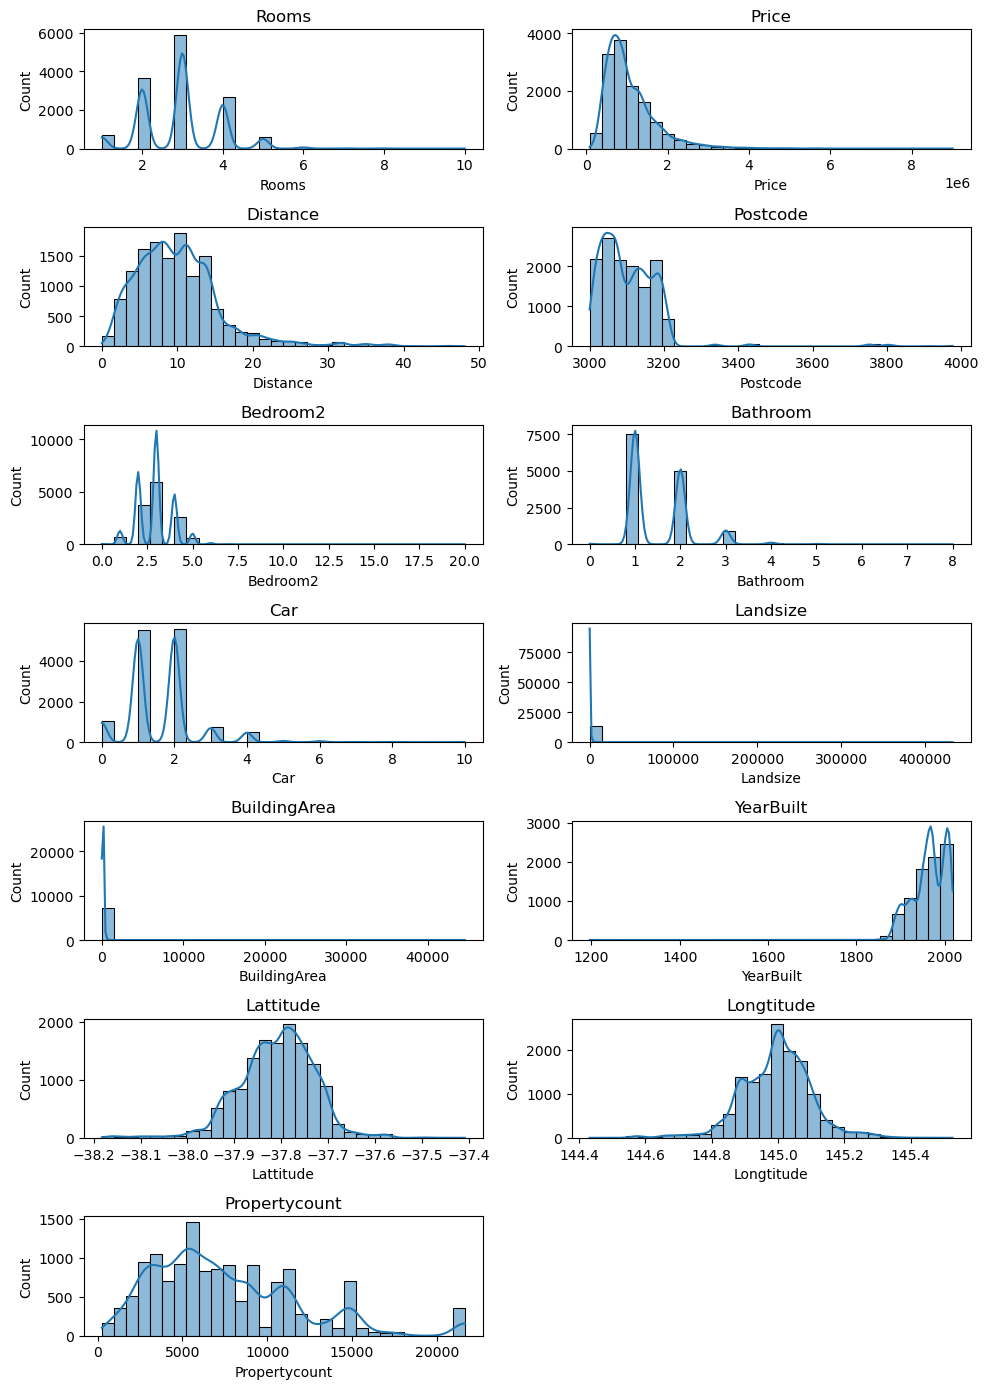

In [15]:
# Get numeric columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# Print numeric columns
print("Numeric Columns:")
print(num_cols)

# Plot histograms for numeric columns
n_cols = 2
n_rows = len(num_cols) // n_cols + (len(num_cols) % n_cols > 0)
plt.figure(figsize=(10, 14))
for i, column in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust the subplot position
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

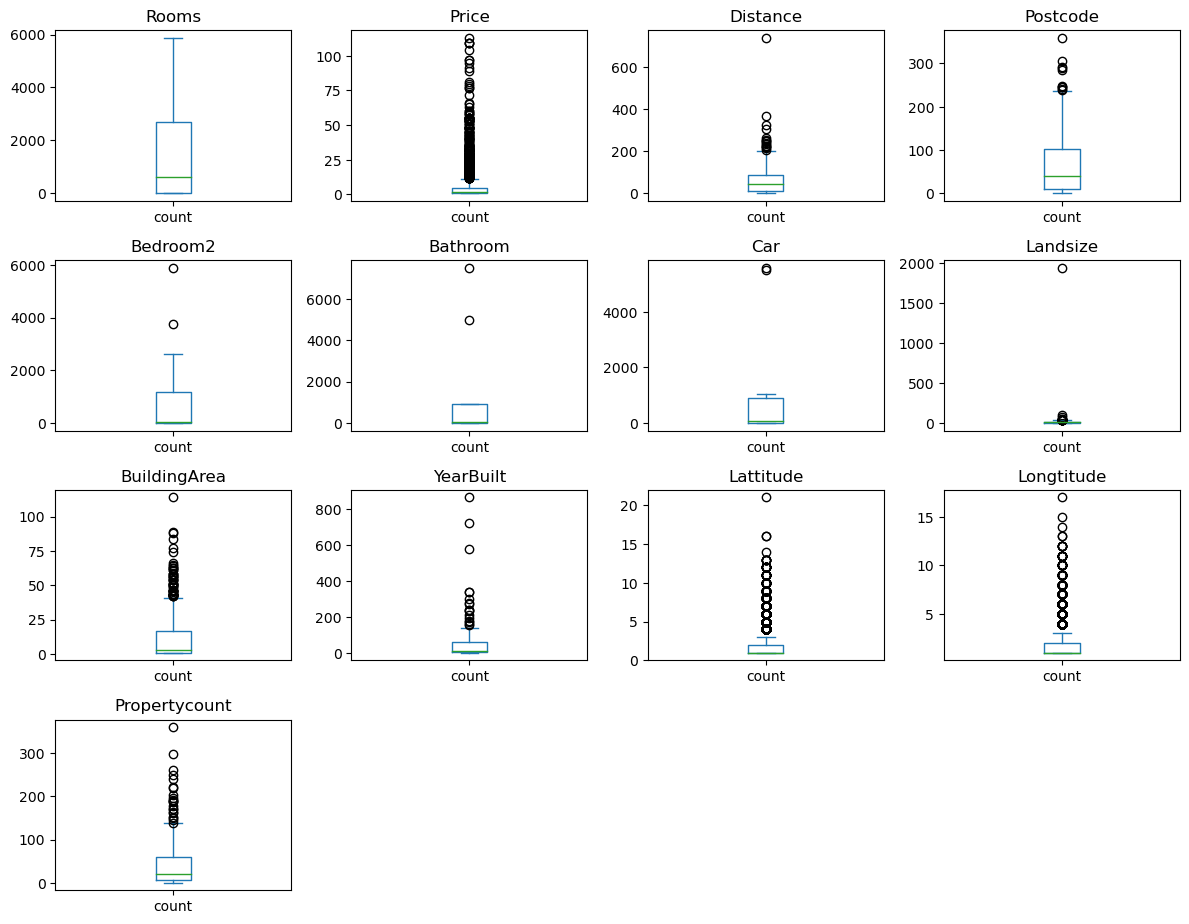

In [16]:
# Box Plots

plt.figure(figsize=(12,16))
for i, column in enumerate(num_cols):
    plt.subplot(n_rows, 4, i + 1)
    df[column].value_counts().plot(kind='box')
    plt.title(column)

plt.tight_layout()
plt.show()

In [17]:
# Prepare the data for linear regression
X = df[['Rooms']]  # Independent variable
y = df['Price']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Create line_x values (range of Rooms)
line_x = np.linspace(df['Rooms'].min(), df['Rooms'].max(), 100).reshape(-1, 1)

# Predict line_y values using the model
line_y = model.predict(line_x)

# Create the scatter plot
fig = px.scatter(
    df, 
    x='Rooms', 
    y='Price', 
    color='Regionname', 
    symbol='Type', 
    size='Landsize', 
    size_max=60, 
    opacity=0.7, 
    hover_name='Address',
    title='Price vs. Number of Rooms by Region and Type'
)

# Update layout with titles, colors, and grid settings
fig.update_layout(
    xaxis_title='Number of Rooms',
    yaxis_title='Price ($)',
    legend_title='Region and Type',
    font_size=14,
    font_family='Arial',
    margin=dict(l=10, r=10, t=50, b=10),
    paper_bgcolor="#F7F7F7",
    plot_bgcolor="#FFFFFF",
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='gray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='gray')
)

# Add a trend line
fig.add_trace(
    go.Scatter(
        x=line_x.flatten(),  # Flatten to 1D array for plotting
        y=line_y,
        mode='lines',
        name='Trend Line',
        line=dict(color='red', width=2)
    )
)

# Show the plot
fig.show()


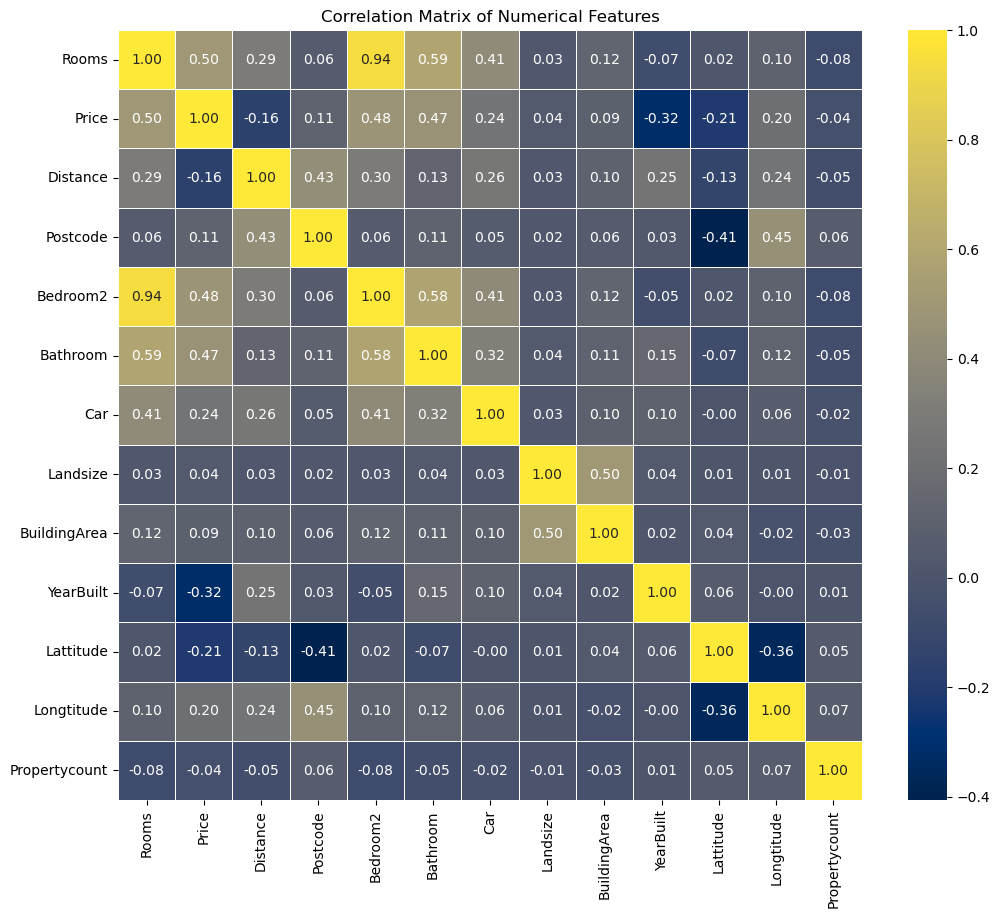

In [18]:
# Correlation Matrix

plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Drop unwanted columns & Handling missing values 

In [19]:
df['Car'].fillna(df['Car'].median(), inplace=True)

df = df.drop(['Address', 'Method', 'SellerG', 'CouncilArea', 'Propertycount', 'Bedroom2', 'Postcode','Landsize','Distance', 
              'Regionname', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], axis=1)

# Step 2: Hypothesis Testing and Probability Calculations

1. For the suburb Altona, it is postulated that a typical property sells for 800,000.  Use the data at hand to test this assumption. Is the typical property price really 800,000 or has it increased? Use a significance level of 5%. 

In [20]:
# Filter data for Altona
altona_data = df[df['Suburb'] == 'Altona']

# Conduct a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(altona_data['Price'], 800000)

# Calculate the significance level
alpha = 0.05

# Results
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The typical property price is not $800,000.")
else:
    print("Fail to reject the null hypothesis: The typical property price is $800,000.")

T-statistic: 1.0277020770199676, P-value: 0.307483271305555
Fail to reject the null hypothesis: The typical property price is $800,000.


2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%.

In [21]:
# Extract year and month
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for 2016
data_2016 = df[df['Year'] == 2016]

# Define summer and winter months
summer_months = [4, 5, 6, 7, 8, 9]  # October to March
winter_months = [10, 11, 12, 1, 2, 3]  # April to September

# Separate data into summer and winter
summer_prices = data_2016[data_2016['Month'].isin(summer_months)]['Price']
winter_prices = data_2016[data_2016['Month'].isin(winter_months)]['Price']

# Conduct an independent t-test
t_statistic, p_value = stats.ttest_ind(summer_prices, winter_prices)

# Results
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a difference in prices between summer and winter months.")
else:
    print("Fail to reject the null hypothesis: There is no difference in prices between summer and winter months.")

T-statistic: -7.343623335051583, P-value: 2.34005572575949e-13
Reject the null hypothesis: There is a difference in prices between summer and winter months.


3. For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places.

In [22]:
# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Calculate the probability of not having car parking
prob_no_car = abbotsford_data['Car'].isnull().mean()

# Calculate the probability of exactly 3 out of 10 properties not having car parking
n = 10
k = 3
probability = stats.binom.pmf(k, n, prob_no_car)

# Results
print(f"Probability of 3 out of 10 properties not having car parking: {round(probability, 3)}")

Probability of 3 out of 10 properties not having car parking: 0.0


4.In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places.

In [23]:
# Calculate the probability of finding a property with 3 rooms
prob_3_rooms = (abbotsford_data['Rooms'] == 3).mean()

# Results
print(f"Probability of finding a property with 3 rooms: {round(prob_3_rooms, 3)}")

Probability of finding a property with 3 rooms: 0.357


5. In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places.

In [24]:
# Calculate the probability of finding a property with 2 bathrooms
prob_2_bathrooms = (abbotsford_data['Bathroom'] == 2).mean()

# Results
print(f"The probability of finding a property with 2 bathrooms in Abbotsford is: {prob_2_bathrooms:.3f}")

The probability of finding a property with 2 bathrooms in Abbotsford is: 0.339
